# Basic Skeleton Creation
---

##### Targets:
Create a basic skeleton with less than 8K parameters which is able to reach 99% in less than 15 epochs. The basic skeleton was created based on the expand and squeeze architecture.

##### Results:
  - Best Train Accuracy - 99.59%
  - Best Test Accuracy - 99.27%
  - Total Parameters - 8000

##### Analysis:
Good starting model but high overfitting

In [ ]:
!git clone https://github.com/garima-mahato/ERA_V1.git

Cloning into 'ERA_V1'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 152 (delta 68), reused 78 (delta 21), pack-reused 0
Receiving objects: 100% (152/152), 2.40 MiB | 15.08 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [ ]:
from ERA_V1.Session7_InDepthCodingPractice import *

In [ ]:
# # CUDA?

cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

device = set_device()

CUDA Available? True


## Dataset Creation

In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [ ]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 96563963.95it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 43247302.33it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26310871.08it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16710990.15it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Data Loader Creation

In [ ]:
# set seed
torch.manual_seed(1)

batch_size = 512

kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
kwargs.update({'batch_size': batch_size, 'shuffle': True})

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

Data Visualization

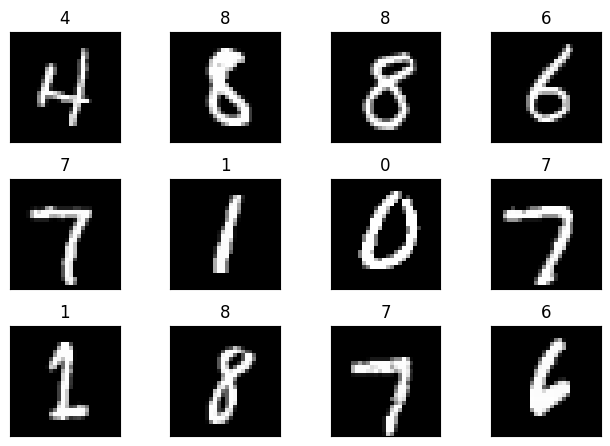

In [ ]:
view_data(train_loader)

## Basic Model

In [ ]:
!pip install torchsummary
from torchsummary import summary

model = Model_7().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 14, 24, 24]           1,008
              ReLU-6           [-1, 14, 24, 24]               0
       BatchNorm2d-7           [-1, 14, 24, 24]              28
           Dropout-8           [-1, 14, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             140
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 14, 10, 10]           1,260
             ReLU-12           [-1, 14, 10, 10]               0
    

### Training and Testing of model

In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

dropout_value = 0 #.05

model = Model_7(dropout_value=dropout_value).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, train_acc, train_losses)
  #scheduler.step()
  test(model, device, test_loader, test_acc, test_losses)


Epoch 1


Train: Loss=0.0996 Batch_id=117 Accuracy=85.17: 100%|██████████| 118/118 [00:21<00:00,  5.46it/s]


Test set: Average loss: 0.1631, Accuracy: 9509/10000 (95.09%)

Epoch 2


Train: Loss=0.0364 Batch_id=117 Accuracy=98.00: 100%|██████████| 118/118 [00:21<00:00,  5.46it/s]


Test set: Average loss: 0.0541, Accuracy: 9833/10000 (98.33%)

Epoch 3


Train: Loss=0.1695 Batch_id=117 Accuracy=98.56: 100%|██████████| 118/118 [00:21<00:00,  5.38it/s]


Test set: Average loss: 0.0441, Accuracy: 9854/10000 (98.54%)

Epoch 4


Train: Loss=0.0391 Batch_id=117 Accuracy=98.78: 100%|██████████| 118/118 [00:21<00:00,  5.48it/s]


Test set: Average loss: 0.0378, Accuracy: 9893/10000 (98.93%)

Epoch 5


Train: Loss=0.0258 Batch_id=117 Accuracy=99.02: 100%|██████████| 118/118 [00:22<00:00,  5.31it/s]


Test set: Average loss: 0.0381, Accuracy: 9889/10000 (98.89%)

Epoch 6


Train: Loss=0.0136 Batch_id=117 Accuracy=99.01: 100%|██████████| 118/118 [00:21<00:00,  5.60it/s]


Test set: Average loss: 0.0357, Accuracy: 9879/10000 (98.79%)

Epoch 7


Train: Loss=0.0276 Batch_id=117 Accuracy=99.21: 100%|██████████| 118/118 [00:20<00:00,  5.68it/s]


Test set: Average loss: 0.0299, Accuracy: 9908/10000 (99.08%)

Epoch 8


Train: Loss=0.0548 Batch_id=117 Accuracy=99.24: 100%|██████████| 118/118 [00:20<00:00,  5.70it/s]


Test set: Average loss: 0.0287, Accuracy: 9908/10000 (99.08%)

Epoch 9


Train: Loss=0.0077 Batch_id=117 Accuracy=99.28: 100%|██████████| 118/118 [00:20<00:00,  5.70it/s]


Test set: Average loss: 0.0318, Accuracy: 9897/10000 (98.97%)

Epoch 10


Train: Loss=0.0552 Batch_id=117 Accuracy=99.36: 100%|██████████| 118/118 [00:21<00:00,  5.49it/s]


Test set: Average loss: 0.0251, Accuracy: 9916/10000 (99.16%)

Epoch 11


Train: Loss=0.0032 Batch_id=117 Accuracy=99.43: 100%|██████████| 118/118 [00:22<00:00,  5.24it/s]


Test set: Average loss: 0.0248, Accuracy: 9920/10000 (99.20%)

Epoch 12


Train: Loss=0.0199 Batch_id=117 Accuracy=99.53: 100%|██████████| 118/118 [00:21<00:00,  5.47it/s]


Test set: Average loss: 0.0271, Accuracy: 9926/10000 (99.26%)

Epoch 13


Train: Loss=0.0038 Batch_id=117 Accuracy=99.55: 100%|██████████| 118/118 [00:21<00:00,  5.45it/s]


Test set: Average loss: 0.0308, Accuracy: 9912/10000 (99.12%)

Epoch 14


Train: Loss=0.0014 Batch_id=117 Accuracy=99.59: 100%|██████████| 118/118 [00:21<00:00,  5.48it/s]


Test set: Average loss: 0.0259, Accuracy: 9917/10000 (99.17%)

Epoch 15


Train: Loss=0.0230 Batch_id=117 Accuracy=99.58: 100%|██████████| 118/118 [00:21<00:00,  5.39it/s]


Test set: Average loss: 0.0247, Accuracy: 9927/10000 (99.27%)



### Accuracy/Loss Visualization

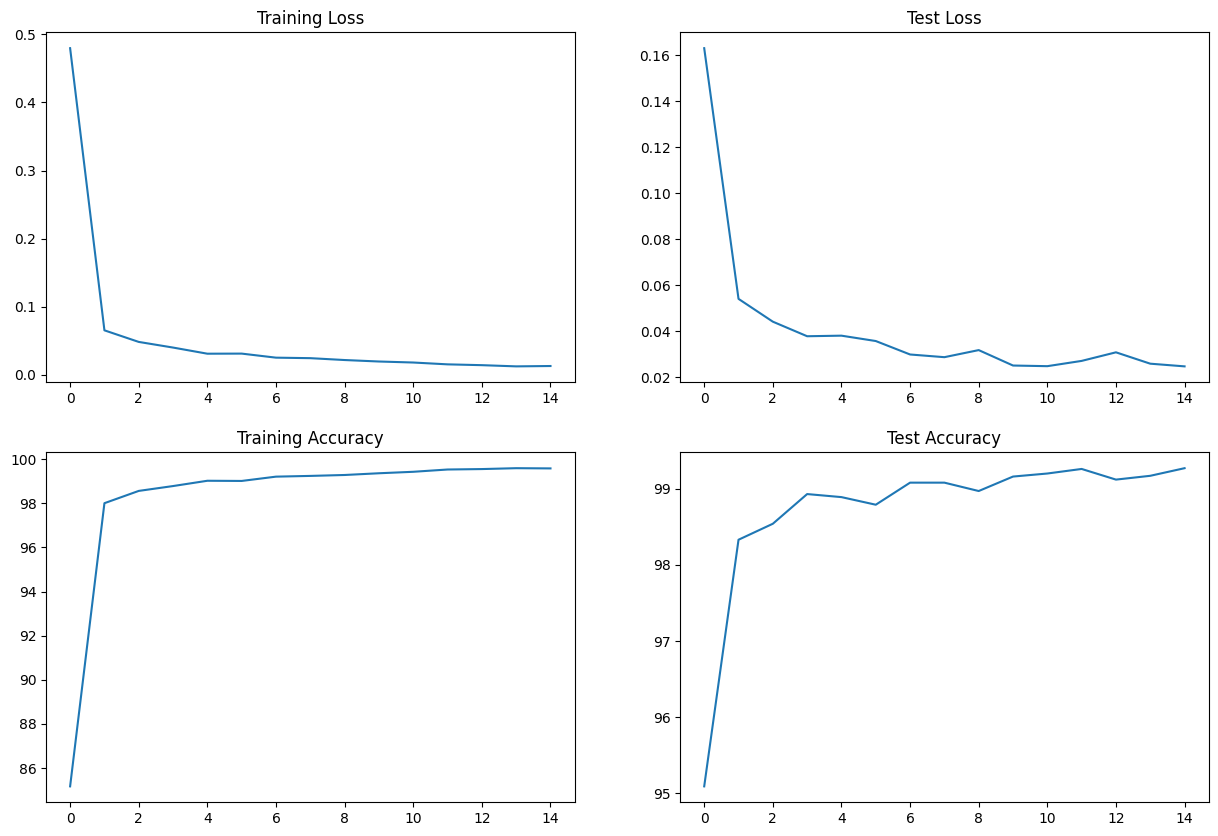

In [ ]:
vis_train_test_comp_graphs(train_losses, train_acc, test_losses, test_acc)